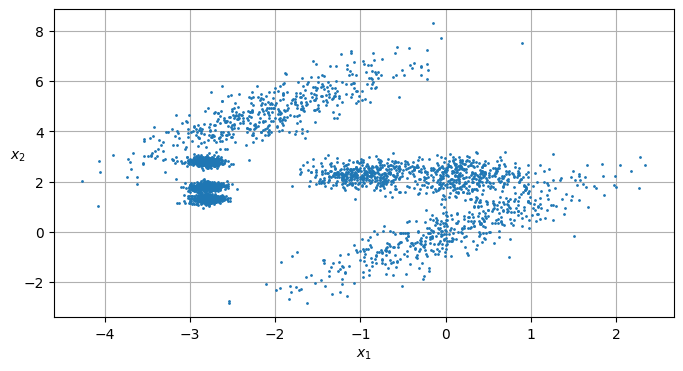

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# extra code – the exact arguments of make_blobs() are not important
blob_centers = np.array([[ 0.2,  2.3], [-1.0 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X1, y1 = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

X2, y2 = make_blobs(n_samples=1000, centers=((10, -8), (0, 0)), random_state=42)
X2 = X2.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))

X = np.r_[X1, X2]
y = np.r_[y1, y2]

# extra code – this cell generates and saves Figure 9–2

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()

plt.show()

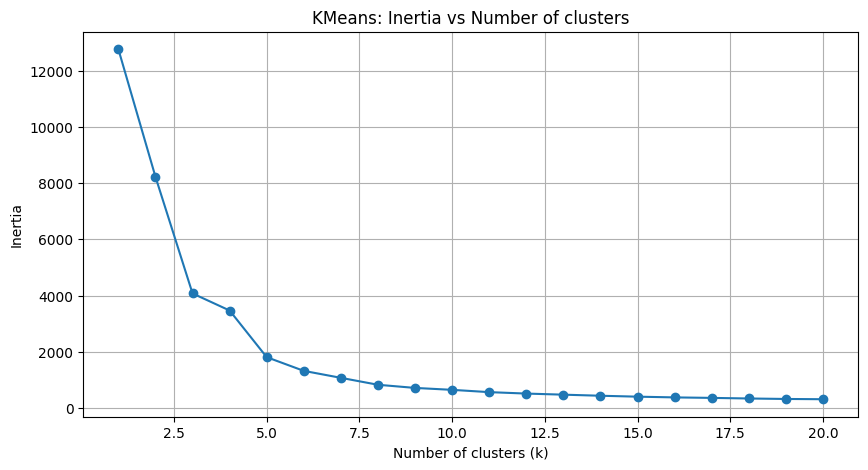

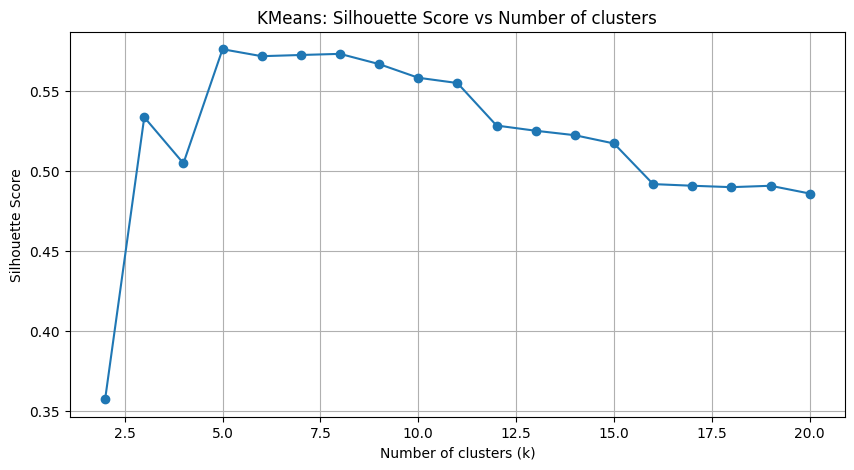

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics

inertia_scores = []
silhouette_scores = []

for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_scores.append(kmeans.inertia_)
    if k > 1:  # silhouette score requires at least 2 clusters
        silhouette_scores.append(metrics.silhouette_score(X, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), inertia_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('KMeans: Inertia vs Number of clusters')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(2, 21), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('KMeans: Silhouette Score vs Number of clusters')
plt.grid(True)
plt.show()


In the Inertia plot, we observe a gradual decrease as the number of clusters increases, indicating that more clusters result in tighter clustering. However, in the Silhouette Score plot, we observe fluctuations, suggesting that certain cluster configurations are better than others. For example, a higher silhouette score indicates better-defined clusters.

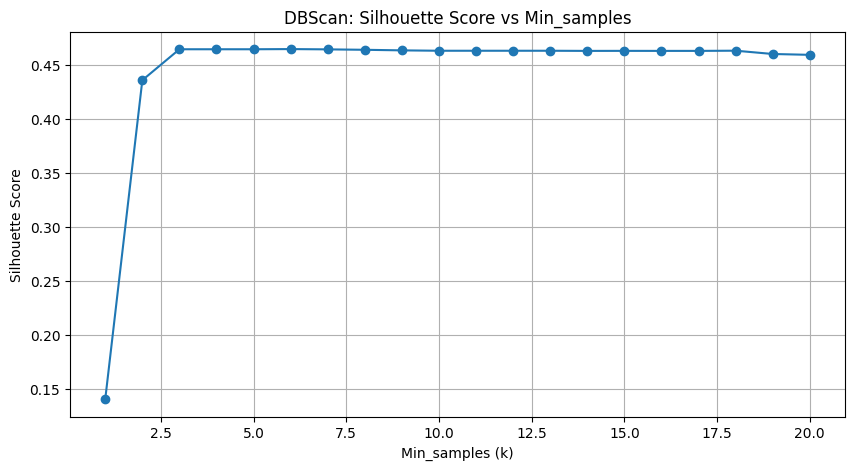

In [8]:
from sklearn.cluster import DBSCAN

silhouette_scores_dbscan = []

for k in range(1, 21):
    dbscan = DBSCAN(eps=0.5, min_samples=k)
    dbscan.fit(X)
    if len(np.unique(dbscan.labels_)) > 1:  # silhouette score requires at least 2 clusters
        silhouette_scores_dbscan.append(metrics.silhouette_score(X, dbscan.labels_))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), silhouette_scores_dbscan, marker='o')
plt.xlabel('Min_samples (k)')
plt.ylabel('Silhouette Score')
plt.title('DBScan: Silhouette Score vs Min_samples')
plt.grid(True)
plt.show()


DBScan doesn't have a direct parameter 'k', instead, it uses 'eps' and 'min_samples'. The silhouette score is calculated by varying 'min_samples' from 1 to 20 while keeping 'eps' constant. Silhouette score measures how dense and well-separated the clusters are. A higher silhouette score indicates denser and better-separated clusters.

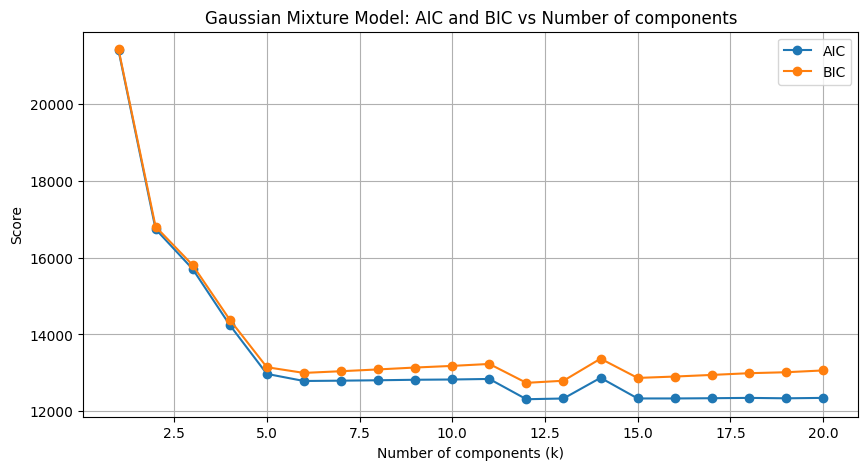

In [9]:
from sklearn.mixture import GaussianMixture

aic_scores = []
bic_scores = []

for k in range(1, 21):
    gmm = GaussianMixture(n_components=k)
    gmm.fit(X)
    aic_scores.append(gmm.aic(X))
    bic_scores.append(gmm.bic(X))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), aic_scores, marker='o', label='AIC')
plt.plot(range(1, 21), bic_scores, marker='o', label='BIC')
plt.xlabel('Number of components (k)')
plt.ylabel('Score')
plt.title('Gaussian Mixture Model: AIC and BIC vs Number of components')
plt.legend()
plt.grid(True)
plt.show()


AIC and BIC are information criteria used for model selection. Lower values of AIC and BIC indicate better models. Both criteria penalize models for complexity (more parameters) but BIC penalizes more severely. In the plot, we observe that as the number of components increases, AIC and BIC decrease. However, BIC decreases more sharply compared to AIC, indicating that simpler models are favored.

Make sure to integrate these sections into your Jupyter Notebook as described in your assignment instructions. Additionally, ensure your code is well-commented and organized to meet the grading criteria.